In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [48]:
df = pd.read_csv("../data/DataWithLocationCleaned.zip")

In [49]:
df.head()

,Port Name,State,Port Code,Border,Date,Measure,Value,Year,Month,position
0,Warroad,Minnesota,3423,US-Canada Border,2019-06-01,Truck Containers Full,133,2019,Jun,"(48.905266, -95.314404)"
1,Warroad,Minnesota,3423,US-Canada Border,2019-06-01,Truck Containers Empty,298,2019,Jun,"(48.905266, -95.314404)"
2,Warroad,Minnesota,3423,US-Canada Border,2019-06-01,Personal Vehicles,10383,2019,Jun,"(48.905266, -95.314404)"
3,Warroad,Minnesota,3423,US-Canada Border,2019-06-01,Personal Vehicle Passengers,19459,2019,Jun,"(48.905266, -95.314404)"
4,Warroad,Minnesota,3423,US-Canada Border,2019-06-01,Pedestrians,2,2019,Jun,"(48.905266, -95.314404)"


In [50]:
df['Date']=pd.to_datetime(df['Date'])
df.dtypes

Port Name            object
State                object
Port Code             int64
Border               object
Date         datetime64[ns]
Measure              object
Value                 int64
Year                  int64
Month                object
position             object
dtype: object

In [51]:
port = df[['Port Name','State','Border','Date','Measure','Value']]

In [52]:
a = port.groupby(['Port Name','Measure'])['Value'].sum()

In [53]:
a.head()

Port Name  Measure                    
Alcan      Bus Passengers                  260769
           Buses                            11552
           Pedestrians                       5782
           Personal Vehicle Passengers    2551411
           Personal Vehicles              1178909
Name: Value, dtype: int64

In [54]:
people = df[df['Measure'].isin(['Personal Vehicle Passengers', 'Bus Passengers','Pedestrians', 'Train Passengers'])]
people.head()

,Port Name,State,Port Code,Border,Date,Measure,Value,Year,Month,position
3,Warroad,Minnesota,3423,US-Canada Border,2019-06-01,Personal Vehicle Passengers,19459,2019,Jun,"(48.905266, -95.314404)"
4,Warroad,Minnesota,3423,US-Canada Border,2019-06-01,Pedestrians,2,2019,Jun,"(48.905266, -95.314404)"
6,Warroad,Minnesota,3423,US-Canada Border,2019-06-01,Bus Passengers,63,2019,Jun,"(48.905266, -95.314404)"
11,Roseau,Minnesota,3426,US-Canada Border,2019-06-01,Personal Vehicle Passengers,7385,2019,Jun,"(48.7710371, -95.7697882)"
13,Roseau,Minnesota,3426,US-Canada Border,2019-06-01,Bus Passengers,118,2019,Jun,"(48.7710371, -95.7697882)"


In [55]:
p_m_s= people[['Port Name','State','Border','Date','Measure','Value']]

In [56]:
p_m_s.groupby(['Port Name','Measure'])['Value'].sum()

Port Name       Measure                    
Alcan           Bus Passengers                   260769
                Pedestrians                        5782
                Personal Vehicle Passengers     2551411
                Train Passengers                      0
Alexandria Bay  Bus Passengers                  1537539
                Pedestrians                       24385
                Personal Vehicle Passengers    36046092
                Train Passengers                      0
Ambrose         Bus Passengers                      257
                Pedestrians                           0
                Personal Vehicle Passengers      138789
                Train Passengers                      0
Anacortes       Bus Passengers                     7808
                Pedestrians                      100785
                Personal Vehicle Passengers     1061140
                Train Passengers                      0
Andrade         Bus Passengers                    24535
    

In [57]:
alc=p_m_s[p_m_s['Port Name']=='Alcan'].groupby(['Port Name','Measure'])['Value'].sum()

In [58]:
alc

Port Name  Measure                    
Alcan      Bus Passengers                  260769
           Pedestrians                       5782
           Personal Vehicle Passengers    2551411
           Train Passengers                     0
Name: Value, dtype: int64

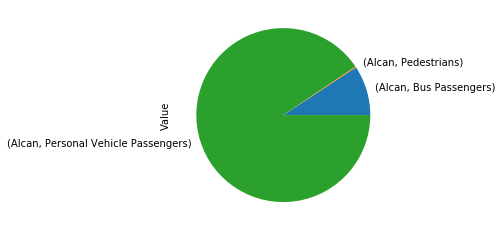

In [59]:
alc.plot.pie()

In [60]:
#begin=p_m_s[p_m_s['Date'].dt.year==1996]
#begin=begin.groupby(['Port Name'])['Value'].sum().sort_values(ascending=False).head(30)

In [61]:
#begin

In [62]:
#end=p_m_s[p_m_s['Date'].dt.year==2018]
#end=end.groupby(['Port Name'])['Value'].sum().sort_values(ascending=False).head(30)

In [63]:
#end

In [64]:
#begin=begin.to_frame()

In [65]:
#begin

In [66]:
#begin['Value']

In [67]:
#begin['Value']

In [68]:
#both.to_frame().head()

In [69]:
#both['Plop']=end

In [70]:
#both.to_frame()

In [71]:
p_m_s.head()

,Port Name,State,Border,Date,Measure,Value
3,Warroad,Minnesota,US-Canada Border,2019-06-01,Personal Vehicle Passengers,19459
4,Warroad,Minnesota,US-Canada Border,2019-06-01,Pedestrians,2
6,Warroad,Minnesota,US-Canada Border,2019-06-01,Bus Passengers,63
11,Roseau,Minnesota,US-Canada Border,2019-06-01,Personal Vehicle Passengers,7385
13,Roseau,Minnesota,US-Canada Border,2019-06-01,Bus Passengers,118


In [72]:
start=p_m_s[p_m_s['Date'].dt.year==1996]
start.head()

,Port Name,State,Border,Date,Measure,Value
334336,El Paso,Texas,US-Mexico Border,1996-12-01,Train Passengers,0
334337,Ogdensburg,New York,US-Canada Border,1996-12-01,Pedestrians,0
334339,Whitetail,Montana,US-Canada Border,1996-12-01,Personal Vehicle Passengers,700
334346,Roseau,Minnesota,US-Canada Border,1996-12-01,Pedestrians,0
334351,Beecher Falls,Vermont,US-Canada Border,1996-12-01,Personal Vehicle Passengers,12737


In [73]:
s=start.groupby(['Port Name']).sum().sort_values(['Value'], ascending=False).head(30)
s

,Value
Port Name,
El Paso,45994117
Calexico,25701966
Detroit,24728767
Hidalgo,24478797
Laredo,21177071
Brownsville,19096670
Buffalo-Niagara Falls,18231355
Nogales,13515187
Blaine,11928924


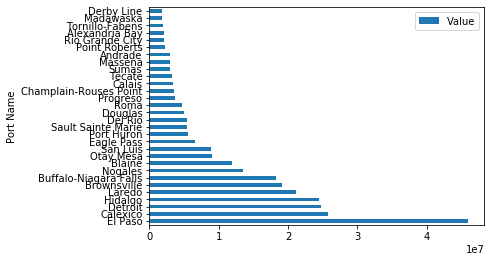

In [74]:
s.plot.barh()

In [75]:
finish=p_m_s[p_m_s['Date'].dt.year==2018]
finish.head()

,Port Name,State,Border,Date,Measure,Value
4799,Roosville,Montana,US-Canada Border,2018-12-01,Pedestrians,8
4800,Ferry,Washington,US-Canada Border,2018-12-01,Pedestrians,2
4805,Del Rio,Texas,US-Mexico Border,2018-12-01,Pedestrians,14207
4810,Sumas,Washington,US-Canada Border,2018-12-01,Pedestrians,5295
4811,Northgate,North Dakota,US-Canada Border,2018-12-01,Personal Vehicle Passengers,2092


In [76]:
f=finish.groupby(['Port Name']).sum().sort_values(['Value'], ascending=False).head(30)
f

,Value
Port Name,
San Ysidro,34671379
El Paso,29646686
Otay Mesa,16752173
Laredo,15115759
Brownsville,12983140
Calexico,12413536
Hidalgo,11560494
Buffalo-Niagara Falls,11522258
Nogales,10774130


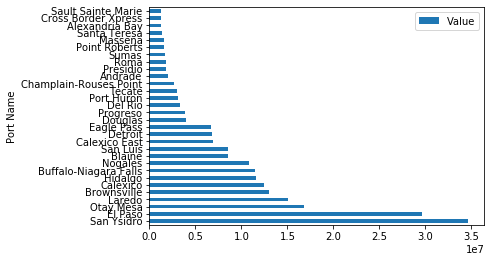

In [77]:
f.plot.barh()

In [78]:
final=pd.merge(f,s,left_on='Port Name',right_on='Port Name')
final

,Value_x,Value_y
Port Name,,
El Paso,29646686,45994117
Otay Mesa,16752173,9094234
Laredo,15115759,21177071
Brownsville,12983140,19096670
Calexico,12413536,25701966
Hidalgo,11560494,24478797
Buffalo-Niagara Falls,11522258,18231355
Nogales,10774130,13515187
Blaine,8496863,11928924


In [79]:
final=final.rename(columns={'Value_x':'1996','Value_y':'2018'})
final

,1996,2018
Port Name,,
El Paso,29646686,45994117
Otay Mesa,16752173,9094234
Laredo,15115759,21177071
Brownsville,12983140,19096670
Calexico,12413536,25701966
Hidalgo,11560494,24478797
Buffalo-Niagara Falls,11522258,18231355
Nogales,10774130,13515187
Blaine,8496863,11928924


In [80]:
#import plotly.graph_objects as go

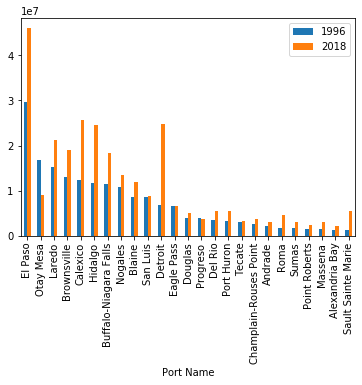

In [81]:
final.plot.bar()

In [82]:
df

,Port Name,State,Port Code,Border,Date,Measure,Value,Year,Month,position
0,Warroad,Minnesota,3423,US-Canada Border,2019-06-01,Truck Containers Full,133,2019,Jun,"(48.905266, -95.314404)"
1,Warroad,Minnesota,3423,US-Canada Border,2019-06-01,Truck Containers Empty,298,2019,Jun,"(48.905266, -95.314404)"
2,Warroad,Minnesota,3423,US-Canada Border,2019-06-01,Personal Vehicles,10383,2019,Jun,"(48.905266, -95.314404)"
3,Warroad,Minnesota,3423,US-Canada Border,2019-06-01,Personal Vehicle Passengers,19459,2019,Jun,"(48.905266, -95.314404)"
4,Warroad,Minnesota,3423,US-Canada Border,2019-06-01,Pedestrians,2,2019,Jun,"(48.905266, -95.314404)"
5,Warroad,Minnesota,3423,US-Canada Border,2019-06-01,Buses,3,2019,Jun,"(48.905266, -95.314404)"
6,Warroad,Minnesota,3423,US-Canada Border,2019-06-01,Bus Passengers,63,2019,Jun,"(48.905266, -95.314404)"
7,Roseau,Minnesota,3426,US-Canada Border,2019-06-01,Trucks,290,2019,Jun,"(48.7710371, -95.7697882)"
8,Roseau,Minnesota,3426,US-Canada Border,2019-06-01,Truck Containers Full,110,2019,Jun,"(48.7710371, -95.7697882)"
9,Roseau,Minnesota,3426,US-Canada Border,2019-06-01,Truck Containers Empty,182,2019,Jun,"(48.7710371, -95.7697882)"


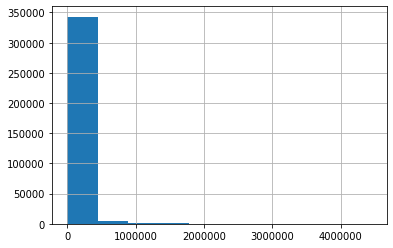

In [83]:
df['Value'].hist()

In [108]:
state=people.groupby('State').sum().drop(columns={'Port Code','Year'}).sort_values('Value',ascending=False).reset_index()
state.head()

,State,Value
0,Texas,2558445984
1,California,1789523545
2,Arizona,670057083
3,New York,534942921
4,Michigan,431539098


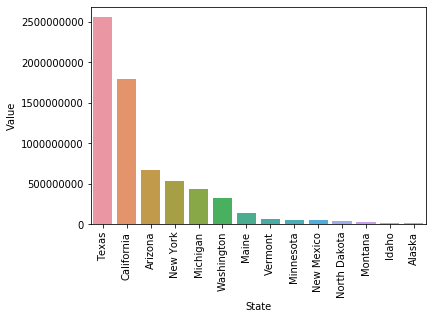

In [111]:
sns.barplot(x='State',y='Value',data=state)
plt.xticks(rotation=90)
plt.ticklabel_format(style='plain', axis='y')